<a href="https://colab.research.google.com/github/qkrwjdduf159/dadaiksunTeamProject/blob/main/ipynb/%EB%B0%95%EC%A0%95%EC%97%B4/Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # /content/drive/MyDrive/Proj_WT/DataSets/박정열/덕수궁_가을.csv
# import os
# from google.colab import drive
# # 구글 드라이브 접근
# ROOT = "/content/drive"
# drive.mount(ROOT)
# from os.path import join
# # 공유 폴더
# CO_WORK = "MyDrive/Proj_WT"
# CW_PATH = join(ROOT, CO_WORK)
# DATAS = "DataSets/박정열/"  # EDA 끝낸 데이터
# DATA_PATH = join(CW_PATH, DATAS)
# import numpy as np
# import pandas as pd
# tour_lst = ['덕수궁', '서대문자연사박물관', '서울시립미술관', '선릉정릉',
#             '종묘', '창경궁', '창덕궁', '태릉강릉', '헌릉인릉']
# season_lst = ['봄', '여름', '가을', '겨울']
# def load_csv2(path=None, tour_list=None, season_list=None):
#   dfname_list = []
#   for df in tour_list:
#     for ss in season_list:
#       dfname_list.append(df+"_"+ss)
#   for fname in dfname_list:
#     try:  # 인코딩 에러 피하기 위한 방법
#       globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fname}.csv", encoding='euc-kr')
#       globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]] #혹시 index도 같이 저장되었으면 없애줌
#     except:
#       try:
#         globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fname}.csv", encoding='cp949')
#         globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
#       except:
#         globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fname}.csv", encoding='utf-8')
#         globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
#   dfname_list = ["DF_"+fname for fname in dfname_list]  #모델 반복문 돌릴 때 필요한 변수(list형태)
#   return dfname_list
# path = DATA_PATH
# dflst = load_csv2(path, tour_lst, season_lst)

#################################################################################################
# 덕수궁 = []
# 서대문자연사박물관 = []

# 관광지 = []
# for i in tour_lst:
#   관광지.append(i)
#   for j in season_lst:
#     data = pd.read_csv(DATA_PATH + i + '_' + j + '.csv')
#     덕수궁.append(data)

# import os
# from google.colab import drive
# # 구글 드라이브 접근
# ROOT = "/content/drive"
# drive.mount(ROOT)
# from os.path import join
# # 공유 폴더
# CO_WORK = "MyDrive/Proj_WT"
# CW_PATH = join(ROOT, CO_WORK)
# DATAS = "DataSets/박정열"  # EDA 끝낸 데이터
# DATA_PATH = join(CW_PATH, DATAS)
# import numpy as np
# import pandas as pd
# def load_csv(path=None):
#   file_list = os.listdir(path)
#   file_list = [fpath for fpath in file_list if '(' not in fpath]
#   dfname_list = []
#   for fpath in file_list:
#     fname = fpath.split('.')[0]
#     dfname_list.append("DF_"+fname) #모델 반복문 돌릴 때 필요한 데이터프레임 변수명 리스트
#     try:  # 인코딩 에러 피하기 위한 방법
#       globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='euc-kr')
#       globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]] #혹시 index도 같이 저장되었으면 없애줌
#     except:
#       try:
#         globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='cp949')
#         globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
#       except:
#         globals()[f"DF_{fname}"] = pd.read_csv(f"{path}/{fpath}", encoding='utf-8')
#         globals()[f"DF_{fname}"] = globals()[f"DF_{fname}"].loc[:, [chk for chk in globals()[f"DF_{fname}"] if "Unnamed" not in chk]]
#   return dfname_list
# path = DATA_PATH
# dflst = load_csv(path)

In [ ]:
# class에 필요한 모든 모듈 불러오기
!pip install vecstack
!pip install catboost
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from vecstack import stacking
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 전체 데이터를 불러오는 class 만들기
class data_bring:
  def data_bring():
    # 관광지를 dict형태로 저장한다.
    target_map = ['ChangDeokGung', 'ChangGyeongGung', 'DuckSooGung', 'GyeongBokGung', 'HeonLeungInReung', 'JongMyo',
                  'SeoDaeMunNaturalHistoryMuseum', 'SeoulMuseumOfArt', 'SunReungJungReung', 'TaeReungGangNeung', 'TrickEyeMuseum',
                  'SeoDaeMunPrisonHistoryMuseum', 'NamSanGolHanOkVillage', 'NationalMuseumOfKorea']

    # colab path를 찾는다.
    PATH = '/content/drive/MyDrive/Proj_WT/DataSets/박정열/'
    # dict로 담아놓을 공간을 만든다.
    bucket = {}
    # items를 사용하여 각 key와 value를 받는다.
    for i in target_map:
      # 불러올 데이터의 path를 지정한다.
      final_path = PATH + i + '.csv'
      # 데이터를 불러온다.
      data = pd.read_csv(final_path)
      # 관광지에 데이터를 담는다.
      bucket[f'{i}'] = data

    return bucket

# 전처리와 각 모델들을 저장할 class를 만든다.
class modeling:
  # train과 test로 나누기
  def train_test_split(data = None):
    # 2017년 12월 이전을 train
    train = data[data['date'] <= 201812]
    # 2017년 12월 이후를 test
    test = data[data['date'] > 201812]
    # 경복궁 데이터는 최고기온이 없기 때문에 try except구문을 사용하여 빼준다.
    # try:
    #   train.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
    #   test.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
    # except:
    #   train.drop(['date','평균 기온(°C)'], axis = 1, inplace = True)
    #   test.drop(['date','평균 기온(°C)'], axis = 1, inplace = True)

    # train을 X_train, y_train으로 나눈다.z
    X_train, y_train = train.drop('target', axis = 1), train['target']
    # test를 X_test, y_test로 나눈다.
    X_test, y_test = test.drop('target', axis = 1), test['target']
    X_test.reset_index(drop = True, inplace = True)

    return X_train, X_test, y_train, y_test

  # linear regression 돌리기
  def lr():
    model = LinearRegression()
    
    return model
  # xgboost 돌리기
  def xgb():
    model = XGBRegressor(random_state = 42,tree_method = 'gpu_hist')

    return model
  # lightgbm
  def lgb():
    model = LGBMRegressor(random_state = 42)

    return model
  # catboost
  def cat():
    model = CatBoostRegressor(random_state = 42,task_type = 'GPU')
    return model
  # ridge
  def ridge():
    model = Ridge(random_state = 42)
    return model
  
  # lasso
  def lasso():
    model = Lasso()

    return model

  # adaboost
  def ada():
    model = AdaBoostRegressor(random_state = 42)

    return model

  # randomforest
  def rfg():
    model = RandomForestRegressor(random_state = 42)
    
    return model

  def gb():
    model = GradientBoostingRegressor(random_state = 42)
    return model

  # rmse가 가장 낮은 것을 데이터 프레임으로 rmse함수를 만든다.
  def rmse(y_test, y_pred):
    RMSE = mean_squared_error(y_test, y_pred)**0.5

    return RMSE

  def smape(true, pred):
    v = 2 * abs(pred - true) / (abs(pred) + abs(true))
    output = np.mean(v) * 100
    return output


# 모델 전부 한번씩 돌려보기
class class_all_model:
  # 각 모델을 돌리기 위해서 dict로 쌓아준다.
  def models():
    models = {'lr':modeling.lr(), 'lgb':modeling.lgb(), 'xgb':modeling.xgb(), 'lasso':modeling.lasso(),'ridge':modeling.ridge(),'ada':modeling.ada(), 'rfg':modeling.rfg(), 'gb':modeling.gb()}
    return models
  
  # 모델을 하나씩 돌려서 keys = 모델명, value = 모델의 rmse를 쌓아준다.
  def run(data = None):
    models = class_all_model.models()
    # 모델별로 rmse를 넣는다.
    final_rmse = {}
    # 모델별로 score를 넣는다.
    model_score = {}
    # 모델의 파라미터를 저장한다. 
    model_store = {}
    # 모델별로 smape을 넣는다.
    model_smape = {}

    # 데이터를 train과 test로 나눈다.
    X_train, X_test, y_train, y_test = modeling.train_test_split(data = data)
    # dict로 쌓아놓은 데이터를 전부 가져온다.
    for i, j in models.items():
      # 각 모델의 y_pred를 구한다.
      model = j
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      
      # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
      final_rmse[i] = modeling.rmse(y_test, y_pred)
      model_score[i] = model.score(X_test, y_test)
      model_store[i] = model
      model_smape[i] = modeling.smape(y_test, y_pred)

    return final_rmse, model_score, model_store, model_smape

# LMM(Linear Mixture Model)
class lmm:
  def linearmodel(data = None):
    X_train, X_test, y_train, y_test = modeling.train_test_split(data)
    model = modeling.lr()
    model.fit(X_train,y_train)
    train_y_pred = model.predict(X_train)
    test_y_pred = model.predict(X_test)

    train_y_pred = pd.DataFrame(train_y_pred, columns = ['target_pred'])
    test_y_pred = pd.DataFrame(test_y_pred, columns = ['target_pred'])

    return train_y_pred, test_y_pred

  def run(data = None):
    X_train, X_test, y_train, y_test = modeling.train_test_split(data = data)
    train_y_pred, test_y_pred = lmm.linearmodel(data = data)
    X_train = pd.concat([X_train, train_y_pred], axis = 1)
    X_test = pd.concat([X_test, test_y_pred], axis = 1)
    model = modeling.lr()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    score = model.score(X_test, y_test)
    rmse = modeling.rmse(y_test, y_pred)
    smape = modeling.smape(y_test, y_pred)

    return rmse, score, model, smape

# dict로 쌓여있는 모델을 돌린다.
class final_model:
  def run(data = None):
    # 위의 class에서 모델을 돌려서 rmse, score, model을 불러온다.
    final_rmse , model_score, model, model_smape = class_all_model.run(data = data)
    lmm_rmse, lmm_score, lmm_model,lmm_smape = lmm.run(data = data)
    model_smape['lmm'] = lmm_smape
    final_rmse['lmm'] = lmm_rmse
    model_score['lmm'] = lmm_score
    model['lmm'] = lmm_model
    # model_score의 key = 모델 , value = 모델의 score를 받는다.
    for i, j in model_score.items():
      # score가 가장 높은 모델을 찾아낸다.
      if j == max(model_score.values()):
        # score가 가장 높은 모델을 dataframe의 형태로 만들기 위한 작업을 한다.
        model = model[i]
        final_rmse = final_rmse[i]
        model_score = model_score[i]
        model_smape = model_smape[i]

        break

    # 가장 score가 높은 모델의 모델, rmse, score를 데이터 프레임 형태로 저장한다.
    score = pd.DataFrame([[model, final_rmse, model_score, model_smape]], columns = ['model','final_rmse','model_score','model_smape'], index = [i])

    return score

# 각 관광지의 데이터를 하나의 데이터 프레임에 보기 위해서 class 를 생성한다.
class data_concat:
  def final_run():
    # 관광지별 데이터를 전부 불러온다.
    final_dict = data_bring.data_bring()
    # 각 관광지별 rmse, model, score를 저장할 데이터 프레임을 만든다.
    final_dataframe = pd.DataFrame([])
    # 각 관광지별 데이터를 가져온다.
    for i, j in final_dict.items():
      # 각 관광지별 데이터를 위에 선언된 class로 모델을 돌린다.
      dataframe = final_model.run(data = j)
      # 관광지라는 변수를 지정해준다.
      # 왜 이렇게 하는가? index에 바로 안들어가기 때문이다.
      dataframe['TourSpot'] = i
      # 관광지를 concat으로 쌓는다.
      final_dataframe =  pd.concat([final_dataframe,dataframe], axis = 0)
    # 최종 데이터 프레임이 만들어지면 관광지를 index로 변경해준다.
    final_dataframe.index = final_dataframe['TourSpot']
    # 관광지라는 컬럼을 제거한다.
    final_dataframe.drop('TourSpot', axis = 1, inplace = True)

    return final_dataframe

In [ ]:
data_concat.final_run()

[07:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:39:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,model,final_rmse,model_score,model_smape
TourSpot,,,,
ChangDeokGung,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",29173.841432,0.660031,27.562270
ChangGyeongGung,"LGBMRegressor(boosting_type='gbdt', class_weig...",18035.543599,0.520544,26.067941
DuckSooGung,"LGBMRegressor(boosting_type='gbdt', class_weig...",56722.117742,-0.067698,29.816470
GyeongBokGung,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",70227.060666,0.501588,18.926708
HeonLeungInReung,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",1390.756021,0.545698,29.358556
JongMyo,"LGBMRegressor(boosting_type='gbdt', class_weig...",11863.997007,-0.216047,35.306201
SeoDaeMunNaturalHistoryMuseum,"LGBMRegressor(boosting_type='gbdt', class_weig...",5858.504572,-0.033791,18.397336
SeoulMuseumOfArt,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",70860.783957,0.058191,32.025876
SunReungJungReung,"([DecisionTreeRegressor(ccp_alpha=0.0, criteri...",5251.652421,0.844424,12.146138


In [ ]:
# # 데이터를 dict형태로 쌓아서 각 관광지를 key 관광지의 계절을 value로 받게 만들었다.
# class data_bring:
#   def data_bring():
#     target_map = {'ChangDeokGung' : '창덕궁', 'ChangGyeongGung' : '창경궁', 'DuckSooGung' : '덕수궁', 'GyeongBokGung' : '경복궁', 'HeonLeungInReung' : '헌릉인릉', 'JongMyo' : '종묘', 'SeoDaeMunNaturalHistoryMuseum' : '서대문자연사박물관', 'SeoulMuseumOfArt' : '서울시립미술관', 'SunReungJungReung' : '선릉정릉', 'TaeReungGangNeung' : '태릉강릉', 'TrickEyeMuseum' : '트릭아이미술관', 'SeoDaeMunPrisonHistoryMuseum' : '서대문형무소역사관', 'NamSanGolHanOkVillage' : '남산골한옥마을', 'NationalMuseumOfKorea' : '국립중앙박물관'}
#     # season_map = ['','Spring','Summer','Fall','Winter']
#     PATH = '/content/drive/MyDrive/Proj_WT/DataSets/박정열/'
#     담아놓기 = {}
#     for i, j in target_map.items():
#       final_path = PATH + i + '.csv'
#       data = pd.read_csv(final_path)
#       담아놓기[f'{i}'] = data

#     return 담아놓기

# class modeling:
#   # train과 test로 나누기
#   # 전처리에서 했어야할 drop을 여기서 해주네... 뭐 그냥 그렇다구요
#   def train_test_split(data = None):
#     train = data[data['date'] <= 201712]
#     test = data[data['date'] > 201712]

#     try:
#       train.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
#       test.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
#     except:
#       train.drop(['date','평균 기온(°C)'], axis = 1, inplace = True)
#       test.drop(['date','평균 기온(°C)'], axis = 1, inplace = True)

#     X_train, y_train = train.drop('target', axis = 1), train['target']
#     X_test, y_test = test.drop('target', axis = 1), test['target']

#     return X_train, X_test, y_train, y_test

#   # linear regression 돌리기
#   def lr():
#     model = LinearRegression()
    
#     return model

#   # xgboost 돌리기
#   def xgb():
#     model = XGBRegressor(random_state = 42,tree_method = 'gpu_hist')

#     return model

#   # lightgbm
#   def lgb():
#     model = LGBMRegressor(random_state = 42)

#     return model

#   # catboost
#   def cat():
#     model = CatBoostRegressor(random_state = 42,task_type = 'GPU')

#     return model

#   # ridge
#   def ridge():
#     model = Ridge(random_state = 42)
    
#     return model
  
#   # lasso
#   def lasso():
#     model = Lasso()

#     return model

#   # adaboost
#   def ada():
#     model = AdaBoostRegressor(random_state = 42)

#     return model

#   # randomforest
#   def rfg():
#     model = RandomForestRegressor(random_state = 42)

#     return model

#   # rmse가 가장 낮은 것을 데이터 프레임으로 rmse함수를 만든다.
#   def rmse(y_test, y_pred):
#     RMSE = mean_squared_error(y_test, y_pred)**0.5

#     return RMSE

# # 모델 전부 한번씩 돌려보기
# class class_all_model:
#   # 각 모델을 돌리기 위해서 dict로 쌓아준다.
#   def models():
#     models = {'lr':modeling.lr(), 'lgb':modeling.lgb(), 'xgb':modeling.xgb(), 'lasso':modeling.lasso(),'ridge':modeling.ridge(),'ada':modeling.ada(), 'rfg':modeling.rfg()}
#     return models
  
#   # 모델을 하나씩 돌려서 keys = 모델명, value = 모델의 rmse를 쌓아준다.
#   def run(data = None):
#     models = class_all_model.models()
#     final_models = {}
#     model_score = {}
#     model_binning = {}
#     X_train, X_test, y_train, y_test = modeling.train_test_split(data = data)
#     # dict로 쌓아놓은 데이터를 전부 가져온다.
#     for i, j in models.items():
#       model = j
#       model.fit(X_train, y_train)
#       y_pred = model.predict(X_test)
      
#       # 전체 모델을 돌려서 rmse가 가장 낮은 데이터를 찾아온다.
#       final_models[i] = modeling.rmse(y_test, y_pred)
#       model_score[i] = model.score(X_test, y_test)
#       model_binning[i] = model

#     return final_models, model_score, model_binning

# # stacking ensemble
# # class class_stack:
# #   # stacking에 사용할 모델들을 stacking에 바로 넣을 수 있게 만들어준다.
# #   def model_stack():
# #       models = [modeling.lgb(), modeling.cat(), modeling.lr(), modeling.xgb(), modeling.lasso(), modeling.ada(), modeling.rfg(),modeling.ridge()]
# #       return models
# #   # stacking모듈을 사용
# #   def stack(data = None):
# #     X_train, X_test, y_train, y_test = modeling.train_test_split(data = data)

# #     S_train, S_test = stacking(class_stack.model_stack(), X_train, y_train, X_test, regression = True, metric = ['acc'], n_folds = 3)
# #     model = modeling.lgb()
# #     model.fit(S_train, y_train)
# #     y_pred = model.predict(S_test)
# #     model_score = model.score(S_test, y_test)

#     # return modeling.rmse(y_test, y_pred), model_score, model
# # voting ensemble
# # class class_voting:
# #   # 모델들을 voting에 맞게 모아준다.
# #   def collect_model():
# #     models= [('xgb',modeling.xgb()),('lgb',modeling.lgb()),('rfg',modeling.rfg()),('ada',modeling.ada()),('lr',modeling.lr()),('ridge',modeling.ridge()),('lasso',modeling.lasso()),('cat',modeling.cat())]
    
# #     return models

#   # VotingRegressor를 돌려준다.
#   # def voting(data = None):
#   #   X_train, X_test, y_train, y_test = modeling.train_test_split(data = data)
#   #   model = VotingRegressor(class_voting.collect_model(), )
#   #   model.fit(X_train, y_train)
#   #   y_pred = model.predict(X_test)
#   #   model_score = model.score(X_test, y_test)
#   #   return modeling.rmse(y_test, y_pred), model_score, model

# # class로 짠 모델들을 전부 돌려준다.
# class final_model:
#   def run(data = None):
#     final_rmse , model_score, model = class_all_model.run(data = data)
#     # final_rmse['stack'], model_score['stack'], model['stack'] = class_stack.stack(data = data)
#     # final_rmse['voting'], model_score['voting'], model['voting'] = class_voting.voting(data = data)

#     for i, j in model_score.items():
#       if j == max(model_score.values()):
#         model = model[i]
#         final_rmse = final_rmse[i]
#         model_score = model_score[i]
#         break

#     score = pd.DataFrame([[model, final_rmse, model_score]], columns = ['model','final_rmse','model_score'], index = [i])

#     return score

# # 계절별로 데이터 프레임 만들기
# class data_concat:
#   def data_concat(data = [None]):
#     final_data = pd.DataFrame([], columns = ['model','final_rmse','model_score'])
#     a = final_model.run(data = data)
#     final_data = pd.concat([final_data, a], axis = 0)

#     return final_data

#   def final_run():
#     final_dict = data_bring.data_bring()
#     final_dataframe = pd.DataFrame([])
#     for i, j in final_dict.items():
#       dataframe = data_concat.data_concat(data = j)
#       dataframe['관광지'] = i
#       final_dataframe =  pd.concat([final_dataframe,dataframe], axis = 0)
#     return final_dataframe

#   # def 
#     print('------ 끝 --------------------------------------------------')

In [ ]:
# 학습된 모델 저장하기
# import pickle
# import joblib

# final_Df = data_concat.final_run()
# for i in final_Df.index:
#   model = final_Df.loc[i, 'model']
#   save_model = pickle.dumps(model)
#   joblib,dump(save_model, f'/content/drive/MyDrive/Proj_WT/ModelScore/{i}의 모델.pkl')

In [ ]:
# class를 이용해서 모든 모델을 돌려준다.
######## base line ############################
# final_rmse, model_score, model = final_model.run(data = data)
# print(final_rmse, model_score, model)

In [ ]:
# 더미화, 

In [ ]:
# class visualizer_class:

In [ ]:
# import statsmodels.api as sm

# train = data[data['date'] <= 201712]
# test = data[data['date'] > 201712]




# X_train, y_train = train.drop('target', axis = 1), train['target']
# X_test, y_test = test.drop('target', axis = 1), test['target']


# model = sm.OLS(y_train, X_train)
# result = model.fit()
# result.summary()

In [ ]:
# y_test

In [ ]:
# 데이터를 dict형태로 쌓아서 각 관광지를 key 관광지의 계절을 value로 받게 만들었다.
# import pandas as pd
# target_map = {'ChangDeokGung' : '창덕궁', 'ChangGyeongGung' : '창경궁', 'DuckSooGung' : '덕수궁', 'GyeongBokGung' : '경복궁', 'HeonLeungInReung' : '헌릉인릉', 'JongMyo' : '종묘', 'SeoDaeMunNaturalHistoryMuseum' : '서대문자연사박물관', 'SeoulMuseumOfArt' : '서울시립미술관', 'SunReungJungReung' : '선릉정릉', 'TaeReungGangNeung' : '태릉강릉', 'TrickEyeMuseum' : '트릭아이미술관', 'SeoDaeMunPrisonHistoryMuseum' : '서대문형무소역사관', 'NamSanGolHanOkVillage' : '남산골한옥마을', 'NationalMuseumOfKorea' : '국립중앙박물관'}
# season_map = ['','Spring','Summer','Fall','Winter']

# PATH = '/content/drive/MyDrive/Proj_WT/DataSets/박정열/'
# 담아놓기 = {}
# for i, j in target_map.items():
#   데이터 = []
#   for k in season_map:
#     try:
#       final_path = PATH + i + '_' + k + '.csv'
#       data = pd.read_csv(final_path)
#       데이터.append(data)
#     except:
#       final_path = PATH + i + '.csv'
#       data = pd.read_csv(final_path)
#       데이터.append(data)
#   담아놓기[j] = 데이터

In [ ]:
# final_data = data_bring.data_bring()
# len(final_data['창덕궁'])

In [ ]:
# final_data.keys()

# 딥러닝으로 비교해보기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/박정열/DuckSooGung.csv')

In [ ]:
data.head()

,date,month,최고 기온(°C),최소 상대습도(%),평균 기온(°C),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),0.5m 지중온도(°C),최대 풍속(m/s),합계 일사량(MJ/m2),target,season,tp_1_0,tp_1_1,tp_1_2,tp_1_3,tp_2_0,tp_2_1,tp_2_2,tp_2_3
0,201101,1,-3.406452,35.129032,-7.183871,53.829032,1.112500,2.796774,7.048387,1.541935,5.593548,9.951290,92135,4.0,1,0,0,0,1,0,0,0
1,201102,2,5.864286,32.000000,1.221429,55.228571,9.700000,2.553571,5.950000,1.025000,5.239286,10.827857,132920,4.0,1,0,0,0,1,0,0,0
2,201103,3,8.345161,25.258065,3.616129,51.112903,2.085714,3.406452,7.748387,5.158065,6.877419,16.342258,64869,1.0,0,1,0,0,0,1,0,0
3,201104,4,15.596667,28.666667,10.720000,54.240000,10.009091,3.243333,6.736667,10.736667,6.650000,16.832333,85548,1.0,0,1,0,0,0,1,0,0
4,201105,5,22.983871,32.161290,17.925806,56.416129,4.107692,2.832258,5.819355,16.303226,6.235484,17.091935,103100,1.0,0,0,1,0,0,0,1,0


In [ ]:
lmm.run(data = data)

ValueError: ignored

In [ ]:
# class Generator(nn.Module):
#   def __init__(self, in_channels = 3, z_dim = 100):


In [ ]:
train = data[data['date'] <= 201712]
test = data[data['date'] > 201712]
train.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
test.drop(['date','최고 기온(°C)','평균 기온(°C)'], axis = 1, inplace = True)
X_train, y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

from sklearn.preprocessing import RobustScaler
# robust 스케일러를 사용하여 데이터를 처리 해준다.
transform = RobustScaler().fit(X_train)
X_train = transform.transform(X_train)
transform = RobustScaler().fit(X_test)
X_test = transform.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Flatten, BatchNormalization
import tensorflow as tf

def rmse(true, pred):
  RMSE = mean_squared_error(true, pred)** 0.5
  return RMSE

# shape 맞춰주기
X_train_t = X_train.reshape(X_train.shape[0], 18,1 )
X_test_t = X_test.reshape(X_test.shape[0], 18,1 )
print(X_train_t.shape, X_test_t.shape, y_train.shape, y_test.shape)
y_train = y_train.values
y_test = y_test.values

# LSTM 사용하기
model = Sequential()
model.add(LSTM(1024, activation = 'relu', input_shape = (X_train_t.shape[1], X_train_t.shape[2], ), return_sequences = True))
model.add(LSTM(512, activation = 'relu', return_sequences = True))
model.add(Dropout(0.1))
model.add(LSTM(256, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(128, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))
BatchNormalization()
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))

model.add(Flatten())
model.add(Dense(1))

model.compile(loss = 'mae', optimizer = 'adam', metrics = ['mean_squared_error'])
print(model.summary())

model.fit(X_train_t, y_train, epochs = 50, batch_size = 1, validation_data = (X_test_t, y_test))
y_pred = model.predict(X_test_t)

(84, 18, 1) (24, 18, 1) (84,) (24,)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 18, 1024)          4202496   
_________________________________________________________________
lstm_5 (LSTM)                (None, 18, 512)           3147776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 18, 512)           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 18, 256)           787456    
_________________________________________________________________
dropout_5 (Dropout)          (None, 18, 256)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 18, 128)           197120    
_________________________________________________________________
dropout_6 (Dropout

In [ ]:
y_pred = model.predict(X_test_t)

In [ ]:
modeling.rmse(y_test, y_pred)

77832.86031008865

In [ ]:
y_test

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/박정열/DuckSooGung.csv')
minmax = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/DuckSooGung_minmax.csv')
robust = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/DuckSooGung_robust.csv')
standard = pd.read_csv('/content/drive/MyDrive/sd솔데스크/팀 프로젝트/DuckSooGung_standard.csv')

In [ ]:
final_model.run(data)

In [ ]:
final_model.run(minmax)

In [ ]:
final_model.run(robust)

In [ ]:
final_model.run(standard)

# 덕수궁

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/DuckSooGung.csv')
data = data.rename(columns = {'덕수궁': 'target'})

In [ ]:
class_all_model.run(data)

[16:17:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'ada': 224585.722496841,
  'gb': 77063.6067796669,
  'lasso': 70501.39790144832,
  'lgb': 51185.51714162037,
  'lr': 74242.29232787085,
  'rfg': 141060.59677013435,
  'ridge': 71322.55389608078,
  'xgb': 183519.7032949889},
 {'ada': -14.730353456857591,
  'gb': -0.8521359293379394,
  'lasso': -0.5501354584667435,
  'lgb': 0.18291284173092925,
  'lr': -0.7190042077287433,
  'rfg': -5.2056264248762165,
  'ridge': -0.5864557598997424,
  'xgb': -9.50363425623923},
 {'ada': AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                    n_estimators=50, random_state=42),
  'gb': GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                            init=None, learning_rate=0.1, loss='ls', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_impurity_split=None,
                            min_samples_leaf=1, min_samples_split=2,
           

In [ ]:
!pip install smogn

In [ ]:
import smogn

train = data[data['date'] < 201901]
test = data[data['date'] >= 201901]
train = train.drop(['month','date'], axis = 1)
test = test.drop(['month','date'], axis = 1)
X_train ,y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

In [ ]:
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:17:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 74160.00019264375, 'lgb': 61057.23322236646, 'xgb': 66278.76019361427, 'lasso': 75045.11085195819, 'ridge': 74389.146065587, 'ada': 74795.60547318045, 'rfg': 65733.30726960927, 'gb': 70187.26446845564}
model_score : {'lr': -0.8250846109029204, 'lgb': -0.23713701109674679, 'xgb': -0.4577810837277827, 'lasso': -0.8689099040519177, 'ridge': -0.8363806388590809, 'ada': -0.856503288875875, 'rfg': -0.43388567488821095, 'gb': -0.6347832943427236}


In [ ]:
## SMOTE를 사용해서 해주기
덕수궁_data = smogn.smoter(data = train, y = 'target', k = 10, samp_method = 'extreme', rel_thres = 0.70, rel_method = 'auto', rel_xtrm_type = 'high', rel_coef = 3)

r_index: 100%|##########| 4/4 [00:00<00:00, 227.80it/s]


In [ ]:
덕수궁_data

,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최대 풍속(m/s),합계 일사량(MJ/m2),0.5m 지중온도(°C),target
0,22.356044,16.585903,32.527937,56.655448,11.966790,2.449521,8.421721,5.266968,16.655951,17.018869,163876
1,25.630284,19.497720,31.241502,56.216743,14.567704,2.379419,9.069953,5.137819,19.165195,18.672576,163122
2,25.595532,19.577032,31.298650,56.286808,14.612368,2.364609,9.066910,5.146405,19.232720,18.806395,163450
3,25.845810,19.555478,31.310623,56.209844,14.554236,2.370855,9.052139,5.139776,19.195267,18.735464,164776
4,25.756218,19.752679,31.188856,56.279086,14.534488,2.366888,9.057407,5.157907,19.082977,18.686121,158103
...,...,...,...,...,...,...,...,...,...,...,...
91,33.303226,28.761290,45.161290,64.719355,12.662500,1.690323,7.500000,4.006452,16.682581,28.416129,69297
92,26.040000,21.496667,38.900000,60.660000,5.708333,1.563333,7.290000,3.450000,15.698667,24.016667,184077
93,18.612903,13.054839,34.354839,59.348387,10.954545,1.545161,7.803226,3.829032,13.010968,17.600000,179495
94,13.153333,7.793333,32.733333,57.480000,8.788889,1.396667,5.920000,3.496667,8.845000,11.693333,141650


In [ ]:
X_train , y_train = 덕수궁_data.drop('target', axis = 1), 덕수궁_data['target']

models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:18:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 54944.17555566142, 'lgb': 64415.05119181698, 'xgb': 67445.72865591424, 'lasso': 57706.800975326325, 'ridge': 54773.176520593595, 'ada': 70598.26190525935, 'rfg': 71104.28279485994, 'gb': 70020.03075601942}
model_score : {'lr': -0.0018135025668910565, 'lgb': -0.37695031951477387, 'xgb': -0.5095672336619534, 'lasso': -0.10508976751182031, 'ridge': 0.004412546458634314, 'ada': -0.6539850385910821, 'rfg': -0.6777802547207312, 'gb': -0.6270022480211994}


Text(0.5, 1.0, 'target')

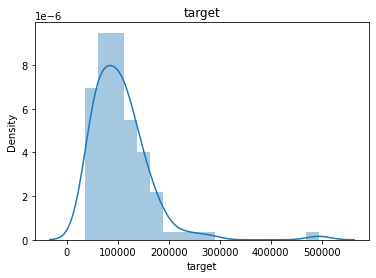

In [ ]:
sns.distplot(data['target'])
plt.title('target')

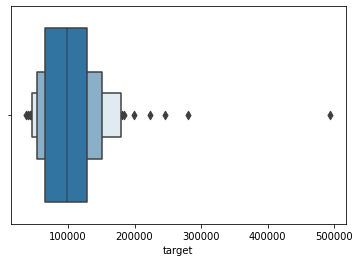

In [ ]:
sns.boxenplot(data['target'])

In [ ]:
!pip install smogn

In [ ]:
import smogn
덕수궁_data = smogn.smoter(data = data, y = 'target', k = 9, samp_method = 'extreme', rel_thres = 0.70, rel_method = 'auto', rel_xtrm_type = 'high', rel_coef = 3)

In [ ]:
print(덕수궁_data.columns, data.columns)

Index(['date', 'month', '최고 기온(°C)', '평균 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최대 풍속(m/s)', '합계 일사량(MJ/m2)',
       '0.5m 지중온도(°C)', 'target'],
      dtype='object') Index(['date', 'month', '최고 기온(°C)', '평균 기온(°C)', '최소 상대습도(%)', '평균 상대습도(%)',
       '일강수량(mm)', '평균 풍속(m/s)', '합계 일조 시간(hr)', '최대 풍속(m/s)', '합계 일사량(MJ/m2)',
       '0.5m 지중온도(°C)', 'target'],
      dtype='object')


In [ ]:
smote_data = 덕수궁_data.drop(['date','month'], axis = 1)
data = data.drop(['date','month'], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis = 1), data['target'], test_size = 0.2, random_state = 42)
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[08:32:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 79300.66804903092, 'lgb': 80968.60870346827, 'xgb': 73455.44681995378, 'lasso': 81249.32036725024, 'ridge': 79933.77961976793, 'ada': 78369.53155930391, 'rfg': 76764.38330608635}
model_score : {'lr': 0.26421035309247476, 'lgb': 0.23293293811343685, 'xgb': 0.36868226386151876, 'lasso': 0.2276049985255012, 'ridge': 0.2524148285822103, 'ada': 0.2813879712492471, 'rfg': 0.31052343153634154}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(smote_data.drop('target', axis = 1), smote_data['target'], test_size = 0.2, random_state = 42)
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[08:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 68034.33828752104, 'lgb': 35624.69545478687, 'xgb': 63182.06585008357, 'lasso': 68551.0885325801, 'ridge': 65516.28248361572, 'ada': 37628.51850506677, 'rfg': 47581.73238033091}
model_score : {'lr': 0.7619087176564602, 'lgb': 0.9347185962364397, 'xgb': 0.7946594090651985, 'lasso': 0.7582781693535003, 'ridge': 0.7792068185315907, 'ada': 0.9271681396315093, 'rfg': 0.8835424460969743}


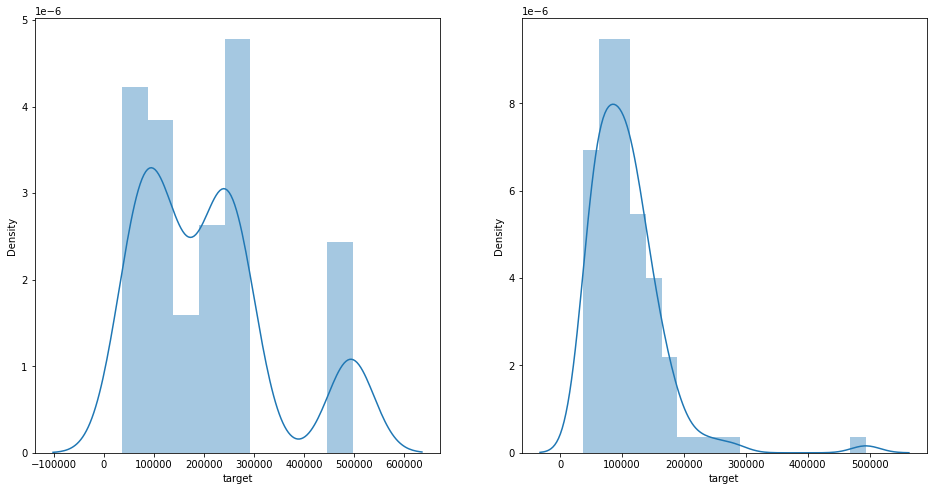

In [ ]:
# target변수를 분포로 살펴보기
fig, ax = plt.subplots(ncols = 2, figsize = (16,8))
sns.distplot(smote_data['target'], ax = ax[0])
sns.distplot(data['target'], ax = ax[1])

# 서울시립미술관

In [ ]:
import pandas as pd
import smogn
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/SeoulMuseumOfArt.csv')
data = data.rename(columns = {'서울시립미술관 본관': 'target'})

In [ ]:
data.head()

,date,month,최고 기온(°C),평균 기온(°C),최소 상대습도(%),평균 상대습도(%),일강수량(mm),평균 풍속(m/s),합계 일조 시간(hr),최저 기온(°C),최대 풍속(m/s),평균 해면기압(hPa),1시간 최다 일사량(MJ/m2),최저 초상온도(°C),평균 5cm 지중온도(°C),평균 30cm 지중온도(°C),5.0cm 지중온도(°C),9-9강수(mm),target
0,201101,1,-3.406452,-7.183871,35.129032,53.829032,1.112500,2.796774,7.048387,-10.522581,5.593548,1027.322581,1.791935,-16.083871,-3.261290,-1.077419,17.183871,0.741667,234587
1,201102,2,5.864286,1.221429,32.000000,55.228571,9.700000,2.553571,5.950000,-2.460714,5.239286,1022.085714,1.841786,-9.564286,0.578571,0.350000,15.900000,7.850000,171376
2,201103,3,8.345161,3.616129,25.258065,51.112903,2.085714,3.406452,7.748387,-0.119355,6.877419,1021.383871,2.541290,-5.006452,5.216129,5.422581,14.677419,1.537500,260687
3,201104,4,15.596667,10.720000,28.666667,54.240000,10.009091,3.243333,6.736667,6.773333,6.650000,1014.123333,2.452333,1.116667,12.206667,11.726667,13.470000,7.346667,56024
4,201105,5,22.983871,17.925806,32.161290,56.416129,4.107692,2.832258,5.819355,13.570968,6.235484,1010.735484,2.402258,8.935484,19.396774,18.174194,13.241935,5.278571,279310


In [ ]:
train = data[data['date'] < 201901]
test = data[data['date'] >= 201901]
train = train.drop(['month','date'], axis = 1)
test = test.drop(['month','date'], axis = 1)
X_train ,y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

In [ ]:
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 78325.09827240679, 'lgb': 75797.89955561589, 'xgb': 81680.24470263226, 'lasso': 78750.1097076197, 'ridge': 78184.71111877357, 'ada': 76621.93861409236, 'rfg': 72377.93977676617, 'gb': 80910.46144019102}
model_score : {'lr': -0.150674833387618, 'lgb': -0.07761855277210472, 'xgb': -0.25136723095120317, 'lasso': -0.16319640888495338, 'ridge': -0.14655367174470535, 'ada': -0.10117663922297715, 'rfg': 0.017430788675574904, 'gb': -0.22789172836122829}


In [ ]:
## SMOTE를 사용해서 해주기
서울시립미술관_data = smogn.smoter(data = train, y = 'target', k = 10, samp_method = 'extreme', rel_thres = 0.80, rel_method = 'auto', rel_xtrm_type = 'high', rel_coef = 1.5)

r_index: 100%|##########| 4/4 [00:00<00:00, 151.94it/s]


In [ ]:
len(서울시립미술관_data)

169

In [ ]:
X_train,y_train = 서울시립미술관_data.drop('target', axis = 1),서울시립미술관_data['target']

In [ ]:
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:19:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 83253.47239947671, 'lgb': 80834.97292681097, 'xgb': 79390.60248636309, 'lasso': 85893.88748581575, 'ridge': 83149.61125778813, 'ada': 73685.25865121876, 'rfg': 67120.98889430737, 'gb': 79200.49851589596}
model_score : {'lr': -0.30003615533273686, 'lgb': -0.22560157998310393, 'xgb': -0.18219444223567183, 'lasso': -0.383806084224797, 'ridge': -0.2967945123665001, 'ada': -0.01838487931667587, 'rfg': 0.15497917804063546, 'gb': -0.17653959705203115}


# 경복궁

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Proj_WT/DataSets/Seoul/GyeongBokGung.csv')
data = data.rename(columns = {'경복궁': 'target'})

In [ ]:
train = data[data['date'] < 201901]
test = data[data['date'] >= 201901]
train = train.drop(['month','date'], axis = 1)
test = test.drop(['month','date'], axis = 1)
X_train ,y_train = train.drop('target', axis = 1), train['target']
X_test, y_test = test.drop('target', axis = 1), test['target']

In [ ]:
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:20:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 113466.05981809794, 'lgb': 72864.56654139927, 'xgb': 62668.28873539363, 'lasso': 106193.02728398898, 'ridge': 108698.3800747375, 'ada': 72342.57191211899, 'rfg': 65222.95697591882, 'gb': 76287.11312130559}
model_score : {'lr': -0.3011013835798064, 'lgb': 0.46344782194693956, 'xgb': 0.6031056996846185, 'lasso': -0.13964921028689448, 'ridge': -0.1940577575923188, 'ada': 0.47110789995540664, 'rfg': 0.5700874142747832, 'gb': 0.4118588698025424}


In [ ]:
# SMOTE 사용하기
경복궁_data = smogn.smoter(data = train, y = 'target', k = 10, samp_method = 'extreme', rel_thres = 0.80, rel_method = 'auto', rel_xtrm_type = 'high', rel_coef = 2.8)

r_index: 100%|##########| 5/5 [00:00<00:00, 167.14it/s]


In [ ]:
X_train, y_train = 경복궁_data.drop('target', axis = 1), 경복궁_data['target']

In [ ]:
models = class_all_model.models()

model_rmse = {}
model_score = {}
for i, j in models.items():
  # 각 모델의 y_pred를 구한다.
  model = j
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # 전체 모델을 돌려서 각 모델별로 rmse, score,model을 저장한다.
  model_rmse[i] = mean_squared_error(y_test, y_pred)** 0.5
  model_score[i] = model.score(X_test, y_test)
  
print('model_rmse :', model_rmse)
print('model_score :', model_score)

[16:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
model_rmse : {'lr': 90026.53575988422, 'lgb': 88389.10815244715, 'xgb': 75116.17925164873, 'lasso': 77919.644863906, 'ridge': 82938.8636391086, 'ada': 70529.92006662916, 'rfg': 76463.87560731353, 'gb': 75944.55936822902}
model_score : {'lr': 0.18093141667156754, 'lgb': 0.210455351016531, 'xgb': 0.42977511008663505, 'lasso': 0.3864172808386567, 'ridge': 0.30482306852602037, 'ada': 0.49728021913626064, 'rfg': 0.4091301853166584, 'gb': 0.41712889800831504}


# TSAUG (Time Series Data Augmentation)



In [ ]:
# !pip install tsaug

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# from tsaug import TimeWarp, Crop, Quantize, Drift, Reverse
# my_augmenter = (
#     TimeWarp() * 5 # random time warping 5 times in parallel
#     +Crop(size = 300) # random crop subsequences with Length 300
#     +Quantize(n_levels = [10,20,30]) # random quantize to 10-, 20-, or 30- Level sets
#     +Drift(max_drift = (0.1,0.5)) @ 0.8 # with 80% probability, random drift the signal up to 10%
#     +Reverse()@0.5 # with 50% probability, reverse the sequence
)

SyntaxError: ignored

In [ ]:
# 경복궁 데이터로 시험해보기
# data.head()

In [ ]:
# !git clone https://github.com/arundo/tsaug.git
# !cd tsaug/
# !git checkout develop
# !pip install ./

In [ ]:
# train = data[data['date'] < 201901]
# test = data[data['date'] >= 201901]
# train = train.drop(['date'], axis = 1)
# test = test.drop(['date'], axis = 1)
# X_train ,y_train = train.drop('target', axis = 1), train['target']
# X_test, y_test = test.drop('target', axis = 1), test['target']

In [ ]:
# X_train = X_train.values
# y_train = y_train.values

In [ ]:
# print(X_train.shape,y_train.shape)

In [ ]:
# 실패.... 변수를 하나만 받아야 하기 때문이다.